In [240]:
import numpy as np
import pandas as pd

In [241]:
df = pd.read_csv("spam.csv",encoding="Latin-1")

In [242]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [243]:
df.shape

(5572, 5)

In [244]:
df.iloc[3]

v1                                                          ham
v2            U dun say so early hor... U c already then say...
Unnamed: 2                                                  NaN
Unnamed: 3                                                  NaN
Unnamed: 4                                                  NaN
Name: 3, dtype: object

1. data cleaning
2. EDA
3. Text Preproccessing
4. Model Building
5. Evaluation
6. Improvement
7. Website
8. Deploy


# Data Cleaning

In [246]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [247]:
#drop last 3 colm
df.drop(columns=["Unnamed: 2","Unnamed: 3" ,"Unnamed: 4"],inplace=True)

In [248]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [249]:
df.rename(columns={"v1":"Target","v2":'text'},inplace=True)

In [250]:
df.head()

,Target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [251]:
df["Target"].value_counts()

ham     4825
spam     747
Name: Target, dtype: int64

In [252]:
df["Target"] = df["Target"].map({'ham':0,'spam':1})
df.head()

,Target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [253]:
#misiing values
df.isnull().sum()

Target    0
text      0
dtype: int64

In [254]:
#duplicates values

df.duplicated().sum()

403

In [255]:
#remove duplicates
df = df.drop_duplicates(keep="first")
df.duplicated().sum()

0

# EDA

In [256]:
df["Target"].value_counts()

0    4516
1     653
Name: Target, dtype: int64

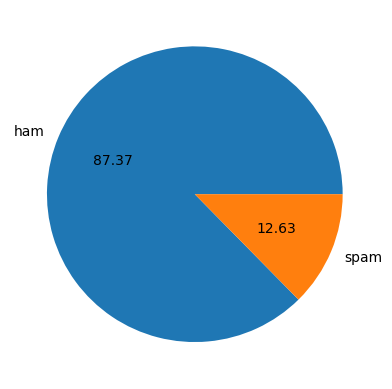

In [211]:
import matplotlib.pyplot as plt
plt.pie(df["Target"].value_counts(),labels=["ham","spam"],autopct="%0.2f")
plt.show()

Data is imbalanced


In [257]:
import nltk

In [258]:
nltk.download("punkt")

[nltk_data] Downloading package punkt to /home/ammar/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [259]:
df['no_characters'] = df['text'].apply(len)
df['no_characters']

0       111
1        29
2       155
3        49
4        61
       ... 
5567    161
5568     37
5569     57
5570    125
5571     26
Name: no_characters, Length: 5169, dtype: int64

In [260]:
df.head()

,Target,text,no_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [261]:
df['no_word'] = df['text'].apply(lambda x :len (nltk.word_tokenize(x)))

In [262]:
df['no_sentence'] = df['text'].apply(lambda x :len( nltk.sent_tokenize(x)))

In [263]:
df.head()

,Target,text,no_characters,no_word,no_sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [264]:
df[['no_word','no_sentence','no_characters']].describe()

,no_word,no_sentence,no_characters
count,5169.000000,5169.000000,5169.000000
mean,18.453279,1.947185,78.977945
std,13.324793,1.362406,58.236293
min,1.000000,1.000000,2.000000
25%,9.000000,1.000000,36.000000
50%,15.000000,1.000000,60.000000
75%,26.000000,2.000000,117.000000
max,220.000000,28.000000,910.000000


In [265]:
#ham
df[df['Target'] == 0][['no_word','no_sentence','no_characters']].describe()

,no_word,no_sentence,no_characters
count,4516.000000,4516.000000,4516.000000
mean,17.120903,1.799601,70.459256
std,13.493725,1.278465,56.358207
min,1.000000,1.000000,2.000000
25%,8.000000,1.000000,34.000000
50%,13.000000,1.000000,52.000000
75%,22.000000,2.000000,90.000000
max,220.000000,28.000000,910.000000


In [266]:
#spam
df[df['Target'] == 1][['no_word','no_sentence','no_characters']].describe()

,no_word,no_sentence,no_characters
count,653.000000,653.000000,653.000000
mean,27.667688,2.967841,137.891271
std,7.008418,1.483201,30.137753
min,2.000000,1.000000,13.000000
25%,25.000000,2.000000,132.000000
50%,29.000000,3.000000,149.000000
75%,32.000000,4.000000,157.000000
max,46.000000,8.000000,224.000000


In [87]:
import seaborn as sns


<AxesSubplot:xlabel='no_characters', ylabel='Count'>

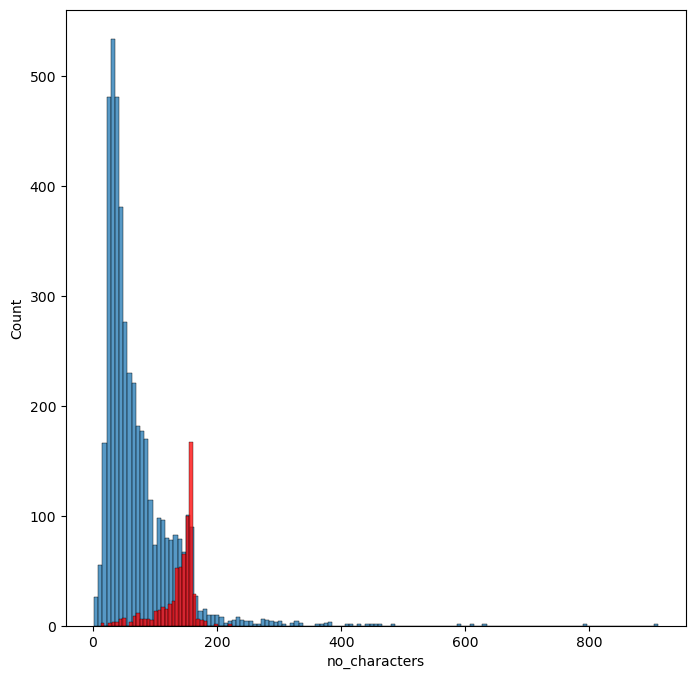

In [219]:
plt.figure(figsize=(8,8))
sns.histplot(df[df['Target'] == 0]['no_characters'])
sns.histplot(df[df['Target'] == 1]['no_characters'],color='red')

from the above hisplot we can clearly see that the number of characters is more in ham messages and less in spam messages

<AxesSubplot:xlabel='no_word', ylabel='Count'>

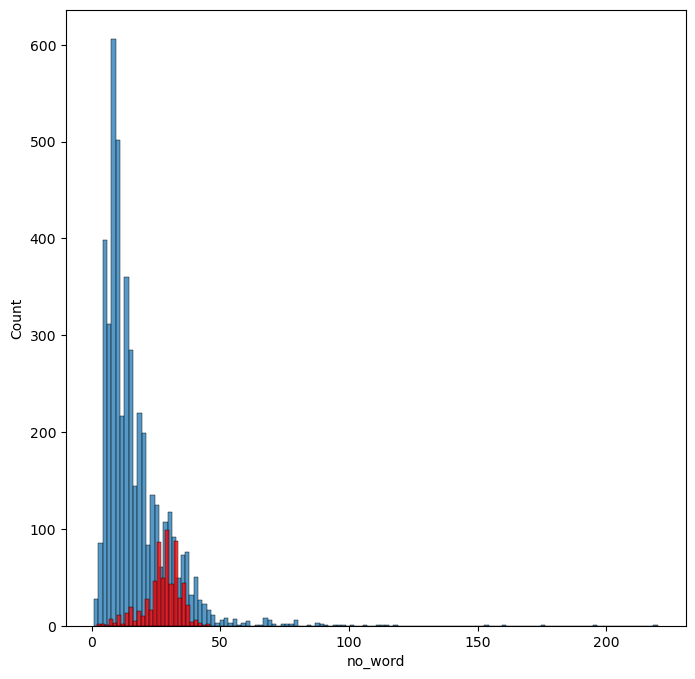

In [220]:
plt.figure(figsize=(8,8))
sns.histplot(df[df['Target'] == 0]['no_word'])
sns.histplot(df[df['Target'] == 1]['no_word'],color='red')

from the above hisplot we can clearly see that the number of words is more in ham messages and less in spam messages

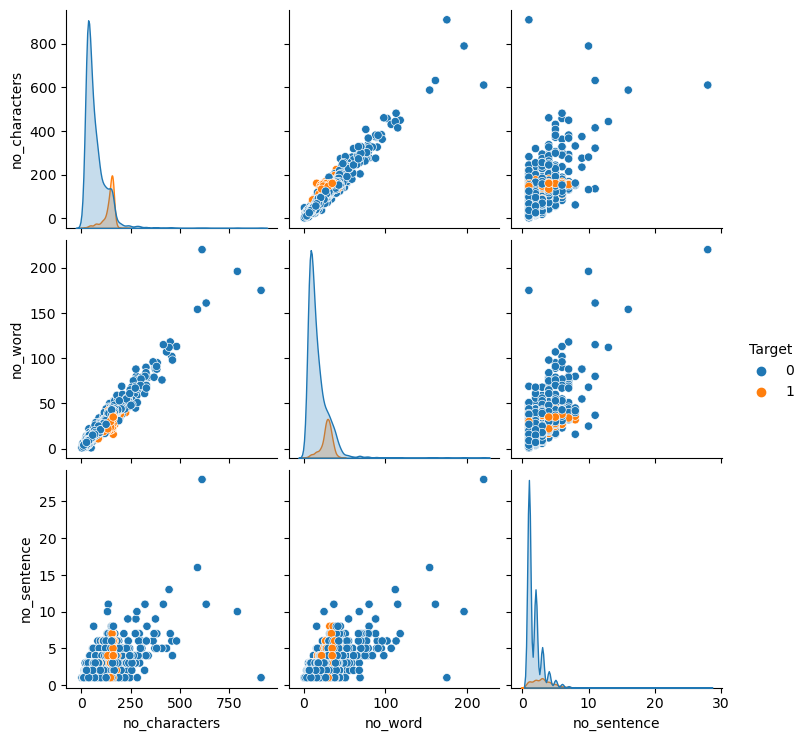

In [325]:
sns.pairplot(df,hue='Target')

<AxesSubplot:>

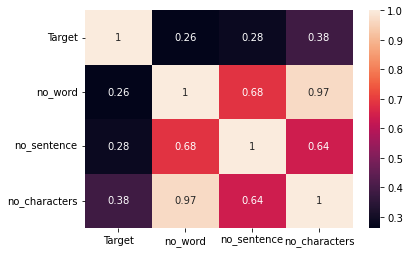

In [36]:
sns.heatmap(df.corr(),annot=True)

# 3 .Data preproccessing

1. Lowercase
2. Tokenization
3. Removing special character
4. Removing stop words and punctuation
5. stemming

In [267]:
def transform_text(text):
    text= text.lower()
    text = nltk.word_tokenize(text)
    y =[]
    for i in text:
        if i.isalnum():
            y.append(i)
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
            
    for i in text:
        ps.stem(i)
        y.append(ps.stem(i))
    
    return " ".join(y)

In [268]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/ammar/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [269]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [270]:
import string 
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [271]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()

In [272]:
transform_text(' dances Go until jurong point, crazy.. Available only ...')

'danc go jurong point crazi avail'

In [273]:
df['text']

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: text, Length: 5169, dtype: object

In [274]:
df['transformed_text'] = df['text'].apply(transform_text)

In [275]:
df.head()

,Target,text,no_characters,no_word,no_sentence,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [276]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color="white")

In [281]:
spam_wc = wc.generate(df[df['Target'] ==1]['transformed_text'].str.cat(sep=" "))
spam_wc

In [282]:
ham_wc = wc.generate(df[df['Target'] ==0]['transformed_text'].str.cat(sep=" "))
ham_wc

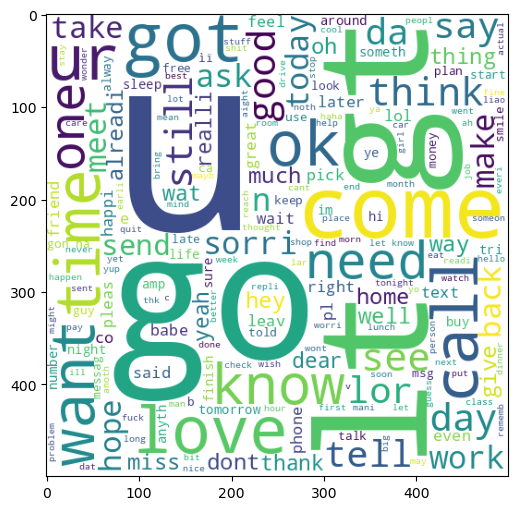

In [286]:
plt.figure(figsize=(8,6))
plt.imshow(spam_wc)

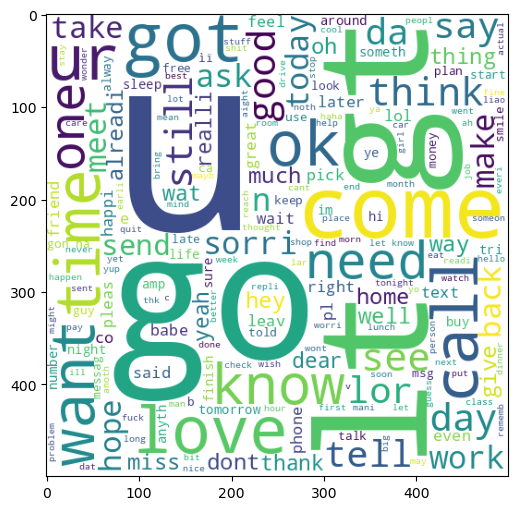

In [284]:
plt.figure(figsize=(8,6))
plt.imshow(spam_wc)

In [287]:
df.head()

,Target,text,no_characters,no_word,no_sentence,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [288]:
spam_corpus=[]
for msg in df[df['Target']==1]['transformed_text'].tolist():
    for words in msg.split():
        spam_corpus.append(words)


In [289]:
spam_corpus

['free',
 'entri',
 '2',
 'wkli',
 'comp',
 'win',
 'fa',
 'cup',
 'final',
 'tkt',
 '21st',
 'may',
 'text',
 'fa',
 '87121',
 'receiv',
 'entri',
 'question',
 'std',
 'txt',
 'rate',
 'c',
 'appli',
 '08452810075over18',
 'freemsg',
 'hey',
 'darl',
 '3',
 'week',
 'word',
 'back',
 'like',
 'fun',
 'still',
 'tb',
 'ok',
 'xxx',
 'std',
 'chg',
 'send',
 'rcv',
 'winner',
 'valu',
 'network',
 'custom',
 'select',
 'receivea',
 'prize',
 'reward',
 'claim',
 'call',
 'claim',
 'code',
 'kl341',
 'valid',
 '12',
 'hour',
 'mobil',
 '11',
 'month',
 'u',
 'r',
 'entitl',
 'updat',
 'latest',
 'colour',
 'mobil',
 'camera',
 'free',
 'call',
 'mobil',
 'updat',
 'co',
 'free',
 '08002986030',
 'six',
 'chanc',
 'win',
 'cash',
 '100',
 'pound',
 'txt',
 'csh11',
 'send',
 'cost',
 '6day',
 'tsandc',
 'appli',
 'repli',
 'hl',
 '4',
 'info',
 'urgent',
 '1',
 'week',
 'free',
 'membership',
 'prize',
 'jackpot',
 'txt',
 'word',
 'claim',
 '81010',
 'c',
 'lccltd',
 'pobox',
 '4403ldnw

In [290]:
len(spam_corpus)

9939

In [293]:
from collections import Counter
spam_most_common = pd.DataFrame(Counter(spam_corpus).most_common(30))
spam_most_common

,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


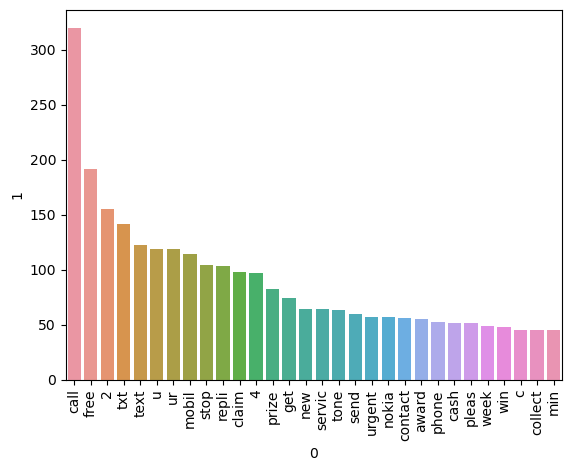

In [292]:
sns.barplot(x=spam_most_common[0],y=spam_most_common[1])
plt.xticks(rotation='vertical')
plt.show()

In [294]:
ham_corpus=[]
for msg in df[df['Target']==0]['transformed_text'].tolist():
    for words in msg.split():
        ham_corpus.append(words)


In [295]:
len(ham_corpus)

35394

In [297]:
from collections import Counter
ham_most_common = pd.DataFrame(Counter(ham_corpus).most_common(30))
ham_most_common

,0,1
0,u,883
1,go,404
2,get,349
3,gt,288
4,lt,287
5,2,284
6,come,275
7,got,236
8,know,236
9,like,234


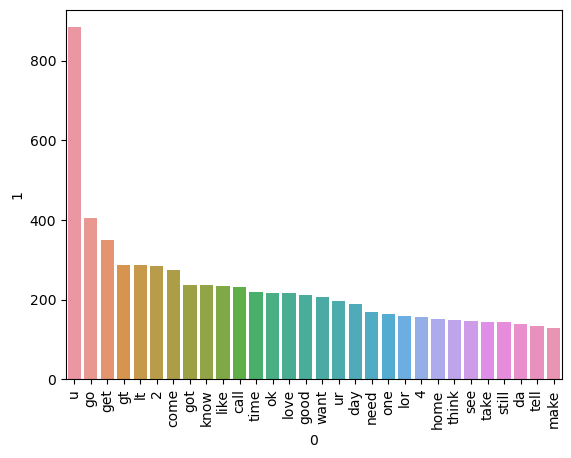

In [298]:
sns.barplot(x=ham_most_common[0],y=ham_most_common[1])
plt.xticks(rotation='vertical')
plt.show()

# 4.Model Building

In [299]:
from sklearn.feature_extraction.text import TfidfVectorizer

Tfidf = TfidfVectorizer(max_features=3000)

In [300]:
x = Tfidf.fit_transform(df['transformed_text']).toarray()

In [301]:
x.shape

(5169, 3000)

In [302]:
y = df['Target'].values

In [303]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.2,random_state=2)

In [304]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [305]:
gnb.fit(x_train,y_train)
y_pred1 = gnb.predict(x_test)

In [307]:
print("The Accuracy score of Gaussian naive bayers is:",accuracy_score(y_test,y_pred1)*100)

print("The confusion Matric of Gaussian naive bayers is:\n ",confusion_matrix(y_test,y_pred1))
print("The Precision Score of Gaussian naive bayers is: ",precision_score(y_test,y_pred1)*100)

The Accuracy score of Gaussian naive bayers is: 86.94390715667312
The confusion Matric of Gaussian naive bayers is:
  [[788 108]
 [ 27 111]]
The Precision Score of Gaussian naive bayers is:  50.68493150684932


In [308]:
mnb.fit(x_train,y_train)
y_pred2 = mnb.predict(x_test)
print("The Accuracy score of Multinomial naive bayers is:",accuracy_score(y_test,y_pred2)*100)
print("The confusion Matric of Multinomial naive bayers is:\n ",confusion_matrix(y_test,y_pred2))
print("The Precision Score of Multinomial naive bayers is: ",precision_score(y_test,y_pred2)*100)

The Accuracy score of Multinomial naive bayers is: 97.09864603481626
The confusion Matric of Multinomial naive bayers is:
  [[896   0]
 [ 30 108]]
The Precision Score of Multinomial naive bayers is:  100.0


In [309]:
bnb.fit(x_train,y_train)
y_pred3 = bnb.predict(x_test)
print("The Accuracy score of Bernoulli naive bayers is:",accuracy_score(y_test,y_pred3)*100)
print("The confusion Matric of Bernoulli naive bayers is:\n ",confusion_matrix(y_test,y_pred3))
print("The Precision Score of Bernoulli naive bayers is: ",precision_score(y_test,y_pred3)*100)

The Accuracy score of Bernoulli naive bayers is: 98.35589941972921
The confusion Matric of Bernoulli naive bayers is:
  [[895   1]
 [ 16 122]]
The Precision Score of Bernoulli naive bayers is:  99.1869918699187


In [150]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier



In [151]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver="liblinear",penalty='l2')
rfc = RandomForestClassifier(n_estimators=50,random_state=2)
abc = AdaBoostClassifier(n_estimators=50,random_state=2)
bc = BaggingClassifier(n_estimators=50,random_state=2)
etc = ExtraTreesClassifier(n_estimators=50,random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)

In [152]:
clfs = {
    'SVC' : svc,
    "KN" :knc,
    'NB' :mnb,
    'DT':dtc,
    'LRC':lrc,
    'RF' : rfc,
    "AdaBoost" :abc,
    "Bgc":bc,
    'ETC':etc,
    'GBC':gbdt
}

In [154]:
def train_classifier(clf,x_train,y_train,x_test,y_test):
    clf.fit(x_train,y_train)
    y_pred = clf.predict(x_test)
    accurancy = accuracy_score(y_test,y_pred)
    precission = precision_score(y_test,y_pred)
    
    return accurancy,precission


In [155]:
train_classifier(svc,x_train,y_train,x_test,y_test)

(0.9758220502901354, 0.9747899159663865)

In [198]:
clfs.items()

dict_items([('SVC', SVC(gamma=1.0, kernel='sigmoid')), ('KN', KNeighborsClassifier()), ('NB', MultinomialNB()), ('DT', DecisionTreeClassifier(max_depth=5)), ('LRC', LogisticRegression(solver='liblinear')), ('RF', RandomForestClassifier(n_estimators=50, random_state=2)), ('AdaBoost', AdaBoostClassifier(random_state=2)), ('Bgc', BaggingClassifier(n_estimators=50, random_state=2)), ('ETC', ExtraTreesClassifier(n_estimators=50, random_state=2)), ('GBC', GradientBoostingClassifier(n_estimators=50, random_state=2))])

In [158]:
accuracy_scores = []
precision_scores = []
for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf,x_train,y_train,x_test,y_test)
    
    print("For",name)
    print("Accuracy - ",current_accuracy)
    print("Precission - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)
    

For SVC
Accuracy -  0.9758220502901354
Precission -  0.9747899159663865
For KN
Accuracy -  0.9052224371373307
Precission -  1.0
For NB
Accuracy -  0.9709864603481625
Precission -  1.0
For DT
Accuracy -  0.9303675048355899
Precission -  0.8173076923076923
For LRC
Accuracy -  0.9564796905222437
Precission -  0.979381443298969
For RF
Accuracy -  0.9748549323017408
Precission -  0.9827586206896551
For AdaBoost
Accuracy -  0.960348162475822
Precission -  0.9292035398230089
For Bgc
Accuracy -  0.9574468085106383
Precission -  0.8671875
For ETC
Accuracy -  0.9748549323017408
Precission -  0.9745762711864406
For GBC
Accuracy -  0.9477756286266924
Precission -  0.92


In [159]:
perfomance_df = pd.DataFrame({'Algorithm':clfs.keys(),"Accuracy":accuracy_scores,"Precission":precision_scores})

In [160]:
perfomance_df.sort_values("Accuracy",ascending=False,inplace=True)

In [161]:
perfomance_df

,Algorithm,Accuracy,Precission
0,SVC,0.975822,0.974790
5,RF,0.974855,0.982759
8,ETC,0.974855,0.974576
2,NB,0.970986,1.000000
6,AdaBoost,0.960348,0.929204
7,Bgc,0.957447,0.867188
4,LRC,0.956480,0.979381
9,GBC,0.947776,0.920000
3,DT,0.930368,0.817308
1,KN,0.905222,1.000000


In [162]:
perfomance_df1 = pd.melt(perfomance_df,id_vars="Algorithm")

In [163]:
perfomance_df1

,Algorithm,variable,value
0,SVC,Accuracy,0.975822
1,RF,Accuracy,0.974855
2,ETC,Accuracy,0.974855
3,NB,Accuracy,0.970986
4,AdaBoost,Accuracy,0.960348
5,Bgc,Accuracy,0.957447
6,LRC,Accuracy,0.956480
7,GBC,Accuracy,0.947776
8,DT,Accuracy,0.930368
9,KN,Accuracy,0.905222


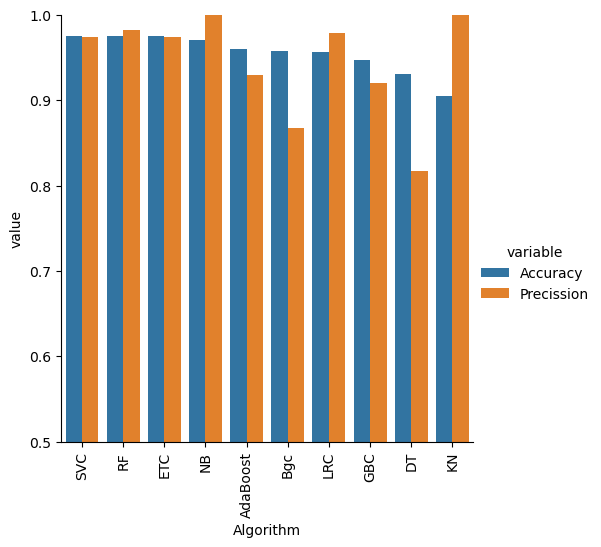

In [164]:
sns.catplot(x ="Algorithm", y="value",
           hue = "variable",data=perfomance_df1,kind='bar',height=5)
plt.ylim(.5,1.0)
plt.xticks(rotation="vertical")
plt.show()

# from above graph we can clearly state that multinomial naive bayers algorithm is the best algorithm for this Model


In [273]:
mnb.fit(x_train,y_train)
y_pred2 = mnb.predict(x_test)
print("The Accuracy score of Multinomial naive bayers is:",accuracy_score(y_test,y_pred2))
print("The confusion Matric of Multinomial naive bayers is:\n ",confusion_matrix(y_test,y_pred2))
print("The Precision Score of Multinomial naive bayers is: ",precision_score(y_test,y_pred2))

In [326]:
#cheking the model with raw input
inputdata = input(str("Enter your String\n"))
text_df = pd.DataFrame(data=[[inputdata]],columns=["text"])
text_df["text"] = text_df["text"].apply(transform_text)
text_vect = Tfidf.transform(text_df["text"]).toarray()
pred = mnb.predict(text_vect)
if pred[0]==0:
    print("Its is a ham message")
    
else:
    print("It is a Spam Message")


Enter your String
Congratulation! You've won $1,000 Walmart gift card.Go to http://bit.ly/123456 tp claim now
It is a Spam Message
